# Introduction:
The project is about predicting the pizza prices based on the below features:
- company
- price_rupiah
- diameter
- topping
- variant
- size
- extra_sauce
- extra_chees
Dataset link: https://www.kaggle.com/knightbearr/pizza-price-prediction

# Importing the required libraries

In [41]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression  
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import  RandomForestRegressor

In [3]:
df=pd.read_csv("pizza_v1.csv")

In [4]:
# view of first five rows
df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,"Rp235,000",22.0,chicken,double_signature,jumbo,yes,yes
1,A,"Rp198,000",20.0,papperoni,double_signature,jumbo,yes,yes
2,A,"Rp120,000",16.0,mushrooms,double_signature,reguler,yes,yes
3,A,"Rp155,000",14.0,smoked beef,double_signature,reguler,yes,no
4,A,"Rp248,000",18.0,mozzarella,double_signature,jumbo,yes,no


In [6]:
# view of last five rows
df.tail()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
124,E,"Rp39,000",8.5,tuna,spicy tuna,small,yes,yes
125,E,"Rp72,000",12.0,tuna,spicy tuna,medium,yes,yes
126,E,"Rp99,000",14.0,tuna,spicy tuna,large,yes,yes
127,E,"Rp44,000",8.5,meat,BBQ_meat_fiesta,small,yes,no
128,E,"Rp78,000",12.0,meat,BBQ_meat_fiesta,medium,no,no


In [8]:
# shape
df.shape

(129, 8)

In [9]:
# columns
df.columns

Index(['company', 'price_rupiah', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese'],
      dtype='object')

In [10]:
# statastical info
df.describe()

,diameter
count,129.000000
mean,12.976744
std,3.272674
min,8.000000
25%,12.000000
50%,12.000000
75%,14.000000
max,22.000000


In [11]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       129 non-null    object 
 1   price_rupiah  129 non-null    object 
 2   diameter      129 non-null    float64
 3   topping       129 non-null    object 
 4   variant       129 non-null    object 
 5   size          129 non-null    object 
 6   extra_sauce   129 non-null    object 
 7   extra_cheese  129 non-null    object 
dtypes: float64(1), object(7)
memory usage: 8.2+ KB


In [12]:
# checking of null values
df.isnull().sum()

company         0
price_rupiah    0
diameter        0
topping         0
variant         0
size            0
extra_sauce     0
extra_cheese    0
dtype: int64

In [13]:
df['price']=df['price_rupiah'].str.replace('Rp','').str.replace(',','').astype(int)
df.drop(['price_rupiah'],axis=1,inplace=True)

In [14]:
df.head()

,company,diameter,topping,variant,size,extra_sauce,extra_cheese,price
0,A,22.0,chicken,double_signature,jumbo,yes,yes,235000
1,A,20.0,papperoni,double_signature,jumbo,yes,yes,198000
2,A,16.0,mushrooms,double_signature,reguler,yes,yes,120000
3,A,14.0,smoked beef,double_signature,reguler,yes,no,155000
4,A,18.0,mozzarella,double_signature,jumbo,yes,no,248000


<AxesSubplot:xlabel='company', ylabel='count'>

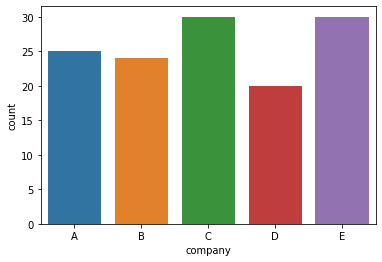

In [17]:
sns.countplot(x="company",data=df)

<AxesSubplot:xlabel='diameter', ylabel='count'>

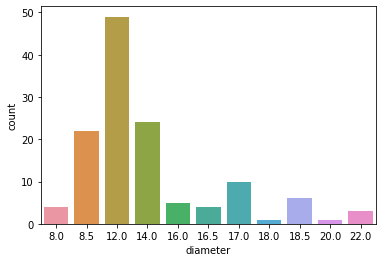

In [18]:
sns.countplot(x="diameter",data=df)

<AxesSubplot:xlabel='topping', ylabel='count'>

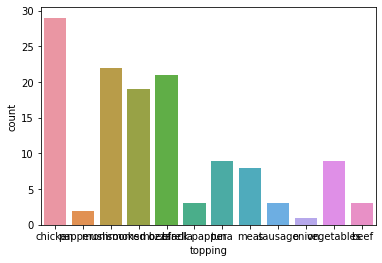

In [19]:
sns.countplot(x="topping",data=df)

<AxesSubplot:xlabel='variant', ylabel='count'>

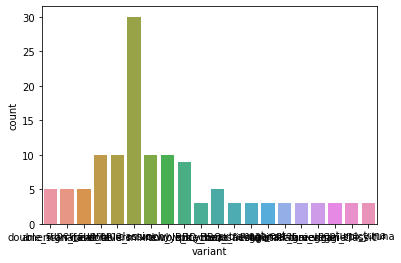

In [20]:
sns.countplot(x="variant",data=df)

<AxesSubplot:xlabel='size', ylabel='count'>

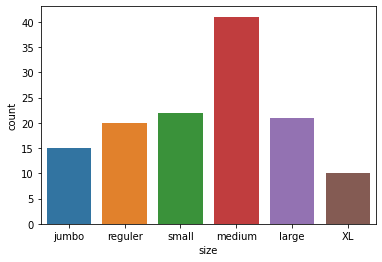

In [21]:
sns.countplot(x="size",data=df)

<AxesSubplot:xlabel='extra_sauce', ylabel='count'>

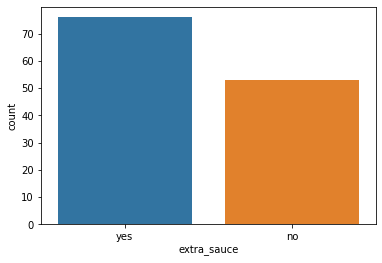

In [22]:
sns.countplot(x="extra_sauce",data=df)

<AxesSubplot:xlabel='extra_cheese', ylabel='count'>

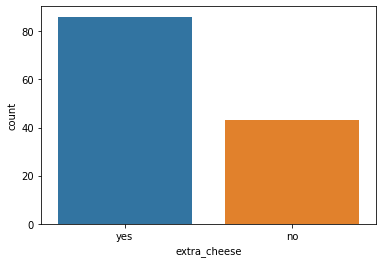

In [23]:
sns.countplot(x="extra_cheese",data=df)

In [24]:
df.drop(['diameter'],axis=1,inplace=True)

In [25]:
df.head()

,company,topping,variant,size,extra_sauce,extra_cheese,price
0,A,chicken,double_signature,jumbo,yes,yes,235000
1,A,papperoni,double_signature,jumbo,yes,yes,198000
2,A,mushrooms,double_signature,reguler,yes,yes,120000
3,A,smoked beef,double_signature,reguler,yes,no,155000
4,A,mozzarella,double_signature,jumbo,yes,no,248000


In [27]:
le=LabelEncoder()

In [30]:
features=(['company', 'topping', 'variant', 'size', 'extra_sauce',
       'extra_cheese'])

In [31]:
for col in features:
    df[col]=le.fit_transform(df[col])

In [33]:
X=df[features]
y=df.price

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=12)

 Decision Trees 
 - It is a type of Supervised Machine Learning (that is you explain what the input is and what the corresponding output is in the training data) where the data is continuously split according to a certain parameter. The tree can be explained by two entities, namely decision nodes and leaves.

In [42]:
model_dt= DecisionTreeRegressor(random_state=12)
model_dt.fit(X_train,y_train)
pred_dt=model_dt.predict(X_test)
print('Testing R2 Score: ', r2_score(y_test, pred_dt)*100)

Testing R2 Score:  64.10022928175746


Random forest regressor
- A random forest regressor. A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting

In [43]:
model_rf= RandomForestRegressor(n_estimators=100)
model_rf.fit(X_train, y_train)
pred_rf= model_rf.predict(X_test)
print('Testing R2 Score: ', r2_score(y_test, pred_rf)*100)

Testing R2 Score:  89.18974143077645


linear regression
- Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data.

In [50]:
regressor= LinearRegression()  
regressor.fit(X_train, y_train)  

LinearRegression()

In [46]:
y_pred= regressor.predict(X_test)

In [47]:
print('Train Score: ', regressor.score(X_train, y_train))  

Train Score:  0.4415802130135965


# conclusion:
Out of the above three models, random forest regression has the highest accuracy.
Hence, we choose the model with highest accuracy.